In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests 

In [2]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [3]:
# we can store it as html
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

In [4]:
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# We can use the method <code>prettify()</code> to display the HTML in the nested structure:

print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>


# Tags

In [6]:
tag_object = soup.title
print('tag object: ', tag_object)

tag object:  <title>Page Title</title>


In [7]:
print('tag object type :' , type(tag_object))

tag object type : <class 'bs4.element.Tag'>


In [8]:
tag_object = soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [9]:
tag_child = tag_object.b
tag_child

<b id="boldest">Lebron James</b>

In [10]:
parent_tag = tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

In [11]:
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [12]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

In [17]:
sibling_1 = tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

In [18]:
sibling_2 = sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

Using the object <code>sibling\_2</code> and the property <code>next_sibling</code> to find the salary of Stephen Curry:

In [19]:
sibling_3 = sibling_2.next_sibling
sibling_3

<p> Salary: $85,000, 000 </p>

# HTML Attributes

If the tag has attributes, the tag <code>id="boldest"</code> has an attribute <code>id</code> whose value is <code>boldest</code>. You can access a tag’s attributes by treating the tag like a dictionary:


In [22]:
tag_child

<b id="boldest">Lebron James</b>

In [21]:
tag_child['id']

'boldest'

In [23]:
tag_child.attrs

{'id': 'boldest'}

In [26]:
tag_child.get('id')

'boldest'

In [27]:
tag_string = tag_child.string
tag_string

'Lebron James'

In [28]:
type(tag_string)

bs4.element.NavigableString

A NavigableString is just like a Python string or Unicode string, to be more precise. The main difference is that it also supports some  <code>BeautifulSoup</code> features. We can covert it to sting object in Python:


In [29]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

# Filter

Filters allow you to find complex patterns, the simplest filter is a string. In this section we will pass a string to a different filter method and Beautiful Soup will perform a match against that exact string.  Consider the following HTML of rocket launchs:


In [30]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [31]:
# We can store it as a Table
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [32]:
table_bs = BeautifulSoup(table, "html.parser")

## find_all

The <code>find_all()</code> method looks through a tag’s descendants and retrieves all descendants that match your filters.

<p>
The Method signature for <code>find_all(name, attrs, recursive, string, limit, **kwargs)<c/ode>
</p>

## Name

When we set the name parameter to a tag name, the method will extract all the tags with that name and its children.

In [34]:
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

In [36]:
first_row = table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [37]:
print(type(first_row))

<class 'bs4.element.Tag'>


In [38]:
first_row.td

<td id="flight">Flight No</td>

In [39]:
for i, row in enumerate(table_rows):
    print('row', i, 'is', row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


In [46]:
for i, row in enumerate(table_rows):
    print('rows', i)
    cells = row.find_all('td')
    for j, cell in enumerate(cells):
        print('column :', j, 'cell', cell)

rows 0
column : 0 cell <td id="flight">Flight No</td>
column : 1 cell <td>Launch site</td>
column : 2 cell <td>Payload mass</td>
rows 1
column : 0 cell <td>1</td>
column : 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>
column : 2 cell <td>300 kg</td>
rows 2
column : 0 cell <td>2</td>
column : 1 cell <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>
column : 2 cell <td>94 kg</td>
rows 3
column : 0 cell <td>3</td>
column : 1 cell <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>
column : 2 cell <td>80 kg</td>


If we use a list we can match against any item in that list.


In [47]:
list_input = table_bs.find_all(name= ['tr', 'td'])
list_input

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 kg</td>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>,
 <td>3</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td>,
 <td>80 kg</td>]

In [48]:
len(list_input)

16

## Attributes

If the argument is not recognized it will be turned into a filter on the tag’s attributes. For example the <code>id</code>  argument, Beautiful Soup will filter against each tag’s <code>id</code> attribute. For example, the first <code>td</code> elements have a value of <code>id</code> of <code>flight</code>, therefore we can filter based on that <code>id</code> value.


In [51]:
table_bs.find_all()

[<table><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr></table>,
 <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a></a>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a

In [52]:
table_bs.find_all(id='flight')

[<td id="flight">Flight No</td>]

In [54]:
list_input = table_bs.find_all(href='https://en.wikipedia.org/wiki/Florida')
list_input

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

If we set the  <code>href</code> attribute to True, regardless of what the value is, the code finds all tags with <code>href</code> value:

In [55]:
table_bs.find_all(href=True)

[<a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a>,
 <a href="https://en.wikipedia.org/wiki/Texas">Texas</a>,
 <a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a>]

Using the logic above, find all the elements without <code>href</code> value

In [56]:
table_bs.find_all(href=False)

[<table><tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr><tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr></table>,
 <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <td id="flight">Flight No</td>,
 <td>Launch site</td>,
 <td>Payload mass</td>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <td>1</td>,
 <td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td>,
 <a></a>,
 <td>300 kg</td>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <td>2</td>,
 <td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td>,
 <td>94 k

## string

With string you can search for strings instead of tags, where we find all the elments with Florida:


In [57]:
table_bs.find_all(string='Florida')

['Florida', 'Florida']

## find

The <code>find_all()</code> method scans the entire document looking for results, it’s if you are looking for one element you can use the <code>find()</code> method to find the first element in the document. Consider the following two table:

In [58]:
%%html
<h3>Rocket Launch </h3>

<p>
<table class='rocket'>
  <tr>
    <td>Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Florida</td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Texas</td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Florida </td>
    <td>80 kg</td>
  </tr>
</table>
</p>
<p>

<h3>Pizza Party  </h3>
  
    
<table class='pizza'>
  <tr>
    <td>Pizza Place</td>
    <td>Orders</td> 
    <td>Slices </td>
   </tr>
  <tr>
    <td>Domino's Pizza</td>
    <td>10</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Little Caesars</td>
    <td>12</td>
    <td >144 </td>
  </tr>
  <tr>
    <td>Papa John's </td>
    <td>15 </td>
    <td>165</td>
  </tr>


Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg
Pizza Place,Orders,Slices
Domino's Pizza,10,100
Little Caesars,12,144
Papa John's,15,165


In [59]:
two_tables="<h3>Rocket Launch </h3><p><table class='rocket'><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table></p><p><h3>Pizza Party  </h3><table class='pizza'><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td >144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr>"

In [60]:
two_tables_bs = BeautifulSoup(two_tables, 'html.parser')

In [61]:
two_tables_bs.find_all("table")

[<table class="rocket"><tr><td>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr><td>1</td><td>Florida</td><td>300 kg</td></tr><tr><td>2</td><td>Texas</td><td>94 kg</td></tr><tr><td>3</td><td>Florida </td><td>80 kg</td></tr></table>,
 <table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>]

We can filter on the class attribute to find the second table, but because class is a keyword in Python, we add an underscore.


In [62]:
two_tables_bs.find_all("table", class_="pizza")

[<table class="pizza"><tr><td>Pizza Place</td><td>Orders</td> <td>Slices </td></tr><tr><td>Domino's Pizza</td><td>10</td><td>100</td></tr><tr><td>Little Caesars</td><td>12</td><td>144 </td></tr><tr><td>Papa John's </td><td>15 </td><td>165</td></tr></table>]

# Downloading And Scraping The Contents Of A Web Page

We Download the contents of the web page:

In [64]:
url = "http://www.ibm.com"

We use get to download the contents of the webpage in text format and store in a variable called data:

In [67]:
import ssl

try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [69]:
data = requests.get(url).text

In [70]:
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'

In [73]:
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>

    print(link.get('href'))

https://www.ibm.com/de/de
https://www.ibm.com/sitemap/de/de
https://www.ibm.com/de-de/products/linuxone-emperor-4?lnk=dehpv18l1
https://www.ibm.com/de-de/security/data-breach?lnk=dehpv18nf1
https://www.ibm.com/de-de/events/think/pop-up-wien?lnk=dehpv18l1
https://www.ibm.com/de-de/events/turn-vision-into-action?lnk=dehpv18f2
https://www.ibm.com/consulting/de-de?lnk=dehpv18f3
https://www.ibm.com/de-de/analytics/data-fabric?lnk=dehpv18f4
https://www.ibm.com/de-de/about/automation?lnk=dehpv18f5
/de-de/products/offers-and-discounts?lnk=STW_DE_HPT_TL&psrc=NONE&pexp=DEF&lnk2=goto_MPDISC
https://www.ibm.com/de-de/cloud/cloud-pak-for-automation?lnk=STW_DE_HP_D1_TL&psrc=NONE&pexp=DEF&lnk2=trial_PHP
https://www.ibm.com/de-de/verify/verify-identity?lnk=STW_DE_HP_D2_TL&psrc=NONE&pexp=DEF&lnk2=trial_PHP
https://www.ibm.com/de-de/products/watson-assistant?lnk=STW_DE_HP_D3_TL&psrc=NONE&pexp=DEF&lnk2=trial_PHP
https://www.ibm.com/de-de/products/unified-endpoint-management?lnk=STW_DE_HPT_T4_BLK&lnk2=tri

## Scrape all images Tags

In [76]:
for link in soup.find_all("img"):
    print(link)
    print(link.get('src'))

<img alt="IBM Pop-up" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-09-12/IBM_PopUp_Banner_Rendering_444x254.png"/>
//1.cms.s81c.com/sites/default/files/2022-09-12/IBM_PopUp_Banner_Rendering_444x254.png
<img alt="Sechs Pictogramme" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-08-10/IBM_Turn_Vision_into_Action_2022-Webpage-444x254px.jpeg"/>
//1.cms.s81c.com/sites/default/files/2022-08-10/IBM_Turn_Vision_into_Action_2022-Webpage-444x254px.jpeg
<img alt="Das Bild zeigt Salzbrezeln auf blauem Hintergrund" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-05-31/Consulting.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-05-31/Consulting.jpg
<img alt="Kugeln, Scheiben und Daten-Silos in Karos einsortiert" class="" loading="lazy" src="//1.cms.s81c.com/sites/default/files/2022-08-26/Datafabric.jpg"/>
//1.cms.s81c.com/sites/default/files/2022-08-26/Datafabric.jpg
<img alt="Spulen durch Fäden verbunden" class="" loading="laz

## Scrape data from HTML tables

In [77]:
#The below url contains an html table with data about colors and color codes.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"

Before proceeding to scrape a web site, you need to examine the contents, and the way data is organized on the website. Open the above url in your browser and check how many rows and columns are there in the color table.

In [78]:
# get the contents of the webpage in text format and store in a variable called data
data = requests.get(url).text

In [79]:
soup = BeautifulSoup(data, "html.parser")

In [81]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [82]:
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].string # store the value in column 3 as color_name
    color_code = cols[3].string # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_code))

Color Name--->None
lightsalmon--->#FFA07A
salmon--->#FA8072
darksalmon--->#E9967A
lightcoral--->#F08080
coral--->#FF7F50
tomato--->#FF6347
orangered--->#FF4500
gold--->#FFD700
orange--->#FFA500
darkorange--->#FF8C00
lightyellow--->#FFFFE0
lemonchiffon--->#FFFACD
papayawhip--->#FFEFD5
moccasin--->#FFE4B5
peachpuff--->#FFDAB9
palegoldenrod--->#EEE8AA
khaki--->#F0E68C
darkkhaki--->#BDB76B
yellow--->#FFFF00
lawngreen--->#7CFC00
chartreuse--->#7FFF00
limegreen--->#32CD32
lime--->#00FF00
forestgreen--->#228B22
green--->#008000
powderblue--->#B0E0E6
lightblue--->#ADD8E6
lightskyblue--->#87CEFA
skyblue--->#87CEEB
deepskyblue--->#00BFFF
lightsteelblue--->#B0C4DE
dodgerblue--->#1E90FF


# Scrape data from HTML tables into a DataFrame using BeautifulSoup and Pandas


In [83]:
import pandas as pd

In [89]:
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"

data = requests.get(url).text

soup = BeautifulSoup(data, "html.parser")

tables = soup.find_all("table")

In [90]:
len(tables)

25

Assume that we are looking for the 10 most densly populated countries table, we can look through the tables list and find the right one we are look for based on the data in each table or we can search for the table name if it is in the table but this option might not always work.

In [91]:
for index, table in enumerate(tables):
    if ("10 most densely populated countries") in str(table):
        table_index = index
print(table_index)

5


See if you can locate the table name of the table, 10 most densly populated countries, below.

In [92]:
print(tables[table_index])

<table class="wikitable sortable" style="text-align:right">
<caption>10 most densely populated countries <small>(with population above 5 million)</small>
</caption>
<tbody><tr>
<th>Rank</th>
<th>Country</th>
<th>Population</th>
<th>Area<br/><small>(km<sup>2</sup>)</small></th>
<th>Density<br/><small>(pop/km<sup>2</sup>)</small>
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/45px-Flag_of_Singapore.svg.png 2x" width="23"/> </span><a href="/wiki/Singapore" title="Singapore">Singapore</a></td>
<td>5,704,000</td>
<td>710</td>
<td>8,033
</td></tr>
<tr>
<td>2</td>
<td al

In [96]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[1].text.replace('\n', "")
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()
        population_data = population_data.append({"Rank":rank, "Country":country, "Population":population, "Area":area, "Density":density}, ignore_index=True)
        
population_data    

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,704,000",710,"8,033"
1,2,Bangladesh,"173,410,000","143,998","1,204"
2,3,Palestine,"5,266,785","6,020",847
3,4,Lebanon,"6,856,000","10,452",656
4,5,Taiwan,"23,604,000","36,193",652
5,6,South Korea,"51,781,000","99,538",520
6,7,Rwanda,"12,374,000","26,338",470
7,8,Haiti,"11,578,000","27,065",428
8,9,Netherlands,"17,740,000","41,526",427
9,10,Israel,"9,580,000","22,072",434


# Scrape data from HTML tables into a DataFrame using BeautifulSoup and read_html

Using the same url, data, soup, and tables object as in the last section we can use the read_html function to create a DataFrame.

Remember the table we need is located in tables[table_index]

We can now use the pandas function read_html and give it the string version of the table as well as the flavor which is the parsing engine bs4.


In [111]:
#import sys
#!{sys.executable} -m pip install html5lib

import html5lib

pd.read_html(str(tables[5]))

[   Rank      Country  Population  Area(km2)  Density(pop/km2)
 0     1    Singapore     5704000        710              8033
 1     2   Bangladesh   173410000     143998              1204
 2     3    Palestine     5266785       6020               847
 3     4      Lebanon     6856000      10452               656
 4     5       Taiwan    23604000      36193               652
 5     6  South Korea    51781000      99538               520
 6     7       Rwanda    12374000      26338               470
 7     8        Haiti    11578000      27065               428
 8     9  Netherlands    17740000      41526               427
 9    10       Israel     9580000      22072               434]

The function `read_html` always returns a list of DataFrames so we must pick the one we want out of the list.

In [112]:
population_data_read_html = pd.read_html(str(tables[5]))[0]
population_data_read_html

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,173410000,143998,1204
2,3,Palestine,5266785,6020,847
3,4,Lebanon,6856000,10452,656
4,5,Taiwan,23604000,36193,652
5,6,South Korea,51781000,99538,520
6,7,Rwanda,12374000,26338,470
7,8,Haiti,11578000,27065,428
8,9,Netherlands,17740000,41526,427
9,10,Israel,9580000,22072,434


## Scrape data from HTML tables into a DataFrame using read_html

We can also use the read_html function to directly get DataFrames from a url.

In [113]:
url

'https://en.wikipedia.org/wiki/World_population'

In [115]:
datafram_list = pd.read_html(url)
datafram_list[0]

,#,Most populous countries,2000,2015,2030[A]
0,1,China[B],1270,1376,1416
1,2,India,1053,1311,1528
2,3,United States,283,322,356
3,4,Indonesia,212,258,295
4,5,Pakistan,136,208,245
5,6,Brazil,176,206,228
6,7,Nigeria,123,182,263
7,8,Bangladesh,131,161,186
8,9,Russia,146,146,149
9,10,Mexico,103,127,148


In [116]:
len(datafram_list)

25

We can also use the match parameter to select the specific table we want. If the table contains a string matching the text it will be read.


In [129]:
#pd.options.display.float_format = "{:,.1f}".format

pd.read_html(url, match="10 most densely populated countries")[0]

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5704000,710,8033
1,2,Bangladesh,173410000,143998,1204
2,3,Palestine,5266785,6020,847
3,4,Lebanon,6856000,10452,656
4,5,Taiwan,23604000,36193,652
5,6,South Korea,51781000,99538,520
6,7,Rwanda,12374000,26338,470
7,8,Haiti,11578000,27065,428
8,9,Netherlands,17740000,41526,427
9,10,Israel,9580000,22072,434


In [138]:
pd.read_html(url, match="Population by")[0]

,Region,Density(inhabitants/km2),Population(millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,411,778,000 – China[note 1]","13,515,000 – Tokyo Metropolis(37,400,000 – Gre..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo(20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow(20,004,000 – Moscow metrop..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City(21,650,000 – São P..."
4,Northern America[note 2],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City(23,582,649 – New Yo..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[16],N/A[note 3],"00,001,258 – McMurdo Station"


In [140]:
pd.read_html(url, match="populous")[0]

,#,Most populous countries,2000,2015,2030[A]
0,1,China[B],1270,1376,1416
1,2,India,1053,1311,1528
2,3,United States,283,322,356
3,4,Indonesia,212,258,295
4,5,Pakistan,136,208,245
5,6,Brazil,176,206,228
6,7,Nigeria,123,182,263
7,8,Bangladesh,131,161,186
8,9,Russia,146,146,149
9,10,Mexico,103,127,148


In [142]:
url2 = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
df = pd.read_html(url2, match="states")[0]
df

,Rank,Country / Dependency,Continent,Population,Percentage of the world,Date,Source (official or from the United Nations),Notes,Unnamed: 8
0,–,World,All,7977823000,100%,14 Sep 2022,UN projection[3],NaN,NaN
1,1,China,Asia,1412600000,NaN,31 Dec 2021,Official estimate[4],The population figure refers to mainland China...,NaN
2,2,India,Asia,1375586000,NaN,1 Mar 2022,Official projection[5],The figure includes the population of Indian-a...,NaN
3,3,United States,North America,333096384,NaN,14 Sep 2022,National population clock[6],The figure includes the 50 states and the Dist...,NaN
4,4,Indonesia,Asia[b],275773800,NaN,1 Jul 2022,Official estimate[7],NaN,NaN
...,...,...,...,...,...,...,...,...,...
237,–,Niue,Oceania,1549,NaN,1 Jul 2021,National annual projection[96],NaN,NaN
238,–,Tokelau (New Zealand),Oceania,1501,NaN,1 Jul 2021,National annual projection[96],NaN,NaN
239,195,Vatican City,Europe,825,NaN,1 Feb 2019,Monthly national estimate[200],The total population of 825 consisted of 453 r...,NaN
240,–,Cocos (Keeling) Islands (Australia),Oceania,573,NaN,30 Jun 2020,Official estimate[199],NaN,NaN


# Extras (Get DataFrame from Internet and Plot a Choropleth )

In [143]:
import plotly.express as px

In [149]:
dff = df.loc[1:, ['Country / Dependency', "Continent",'Population', 'Date']]
dff.rename(columns={'Country / Dependency' : 'Country', }, inplace=True)
dff

,Country,Continent,Population,Date
1,China,Asia,1412600000,31 Dec 2021
2,India,Asia,1375586000,1 Mar 2022
3,United States,North America,333096384,14 Sep 2022
4,Indonesia,Asia[b],275773800,1 Jul 2022
5,Pakistan,Asia,229489000,1 Jul 2022
...,...,...,...,...
237,Niue,Oceania,1549,1 Jul 2021
238,Tokelau (New Zealand),Oceania,1501,1 Jul 2021
239,Vatican City,Europe,825,1 Feb 2019
240,Cocos (Keeling) Islands (Australia),Oceania,573,30 Jun 2020


## World Population Plot

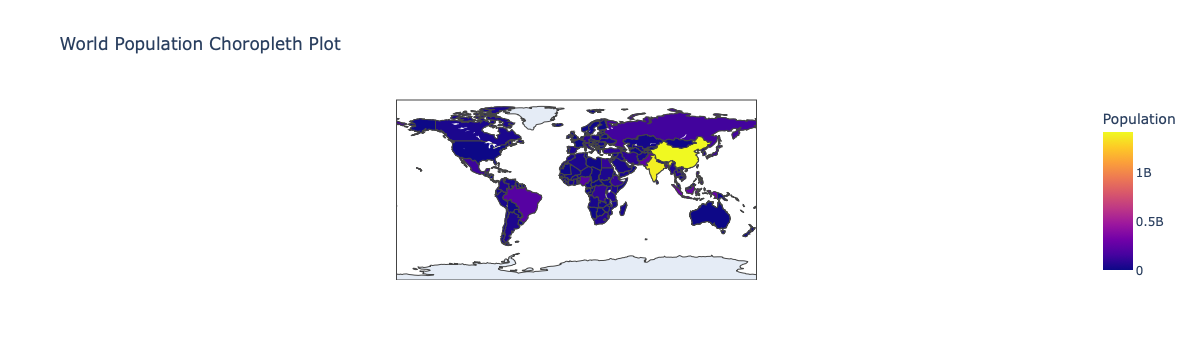

In [167]:
fig = px.choropleth( dff, locations=dff.Country,
                            locationmode='country names',
                            color="Population",
                            hover_name="Country",
                            #projection='natural earth',
                            scope='world',
                            title='World Population Choropleth Plot',
                            #color_continuous_scale=px.colors.sequential.Plasma
                   )

fig.show()

## Europa Population Plot

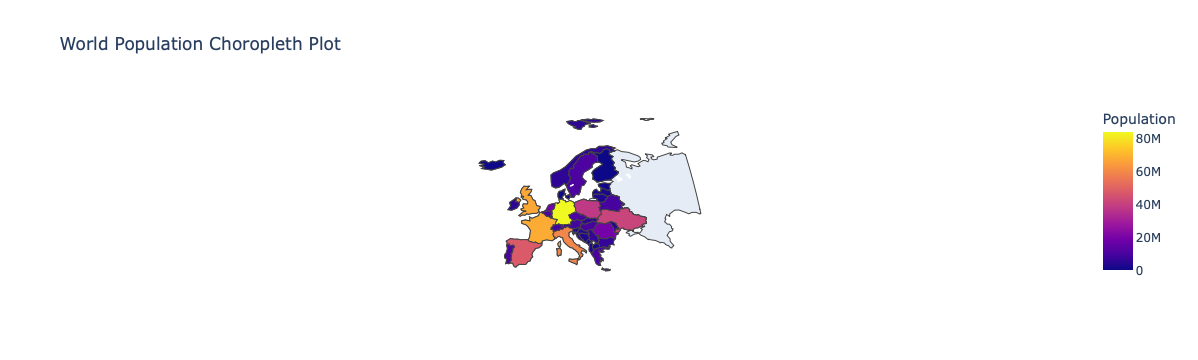

In [171]:

fig = px.choropleth( dff.loc[dff.Continent=='Europe'], locations=dff.loc[dff.Continent=='Europe'].Country,
                            locationmode='country names',
                            color="Population",
                            hover_name="Country",
                            projection='natural earth',
                            scope='europe',
                            title='World Population Choropleth Plot',
                            #color_continuous_scale=px.colors.sequential.Plasma
                   )

fig.show()